In [1]:
# === 1. Mount Google Drive and set working directory ===
from google.colab import drive
import os

drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/BT5153')
print("Current directory:", os.getcwd())

Mounted at /content/gdrive
Current directory: /content/gdrive/.shortcut-targets-by-id/1-EuPWwH26BHpNG41utRuC3Oo7qwXYRcD/BT5153


In [ ]:
# # Unfreeze only 1 layer

# # === 2. Import Packages ===
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from torchvision import models, transforms
# from PIL import Image
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tqdm import tqdm

# # === 3. Set image folder paths ===
# train_dir = os.path.join(os.getcwd(), 'dog label/clean/train')
# test_dir = os.path.join(os.getcwd(), 'dog label/clean/test')

# # === 4. Collect filenames and labels from train_dir ===
# filepaths = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
# labels = [os.path.basename(f).split('_')[0] for f in filepaths]

# le = LabelEncoder()
# encoded_labels = le.fit_transform(labels)

# # === 5. Stratified Split ===
# train_paths, val_paths, train_labels, val_labels = train_test_split(
#     filepaths, encoded_labels, test_size=0.2, stratify=encoded_labels, random_state=42
# )

# # === 6. Define Transform ===
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225])
# ])

# # === 7. Custom Dataset ===
# class DogEmotionFileDataset(Dataset):
#     def __init__(self, filepaths, labels, transform=None):
#         self.filepaths = filepaths
#         self.labels = labels
#         self.transform = transform

#     def __len__(self):
#         return len(self.filepaths)

#     def __getitem__(self, idx):
#         img_path = self.filepaths[idx]
#         image = Image.open(img_path).convert("RGB")
#         if self.transform:
#             image = self.transform(image)
#         label = self.labels[idx]
#         return image, label

# # === 8. Create DataLoaders ===
# train_dataset = DogEmotionFileDataset(train_paths, train_labels, transform=transform)
# val_dataset = DogEmotionFileDataset(val_paths, val_labels, transform=transform)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# # === 9. Define ResNet Model (Only train the last layer) ===
# num_classes = len(le.classes_)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = models.resnet18(pretrained=True)

# # Freeze all layers
# for param in model.parameters():
#     param.requires_grad = False

# # Replace and unfreeze the final fully connected layer
# model.fc = nn.Linear(model.fc.in_features, num_classes)
# for param in model.fc.parameters():
#     param.requires_grad = True

# model = model.to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.fc.parameters(), lr=0.001)   # Only pass the last layer's parameters

# # === 10. Checkpoint Settings ===
# checkpoint_path = os.path.join(os.getcwd(), 'checkpoint.pth')
# best_model_path = os.path.join(os.getcwd(), 'best_resnet_dog_model.pth')
# clear_checkpoint = True  # ← Set to True to start fresh (optional)

# start_epoch = 0
# best_val_acc = 0.0
# patience = 5
# patience_counter = 0

# if clear_checkpoint and os.path.exists(checkpoint_path):
#     os.remove(checkpoint_path)
#     print("🧹 Cleared previous checkpoint.")

# # === 11. Resume from checkpoint if exists ===
# if os.path.exists(checkpoint_path):
#     print("🔄 Resuming from checkpoint...")
#     checkpoint = torch.load(checkpoint_path, map_location=device)
#     model.load_state_dict(checkpoint['model_state_dict'])
#     optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#     start_epoch = checkpoint['epoch'] + 1
#     best_val_acc = checkpoint['best_val_acc']
#     patience_counter = checkpoint['patience_counter']
#     print(f"✅ Resumed from epoch {start_epoch}, best_val_acc = {best_val_acc:.2f}")

# # === 12. Train Model with Early Stopping and Checkpoint ===
# num_epochs = 10
# for epoch in range(start_epoch, num_epochs):
#     model.train()
#     total_loss = 0
#     for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#     print(f"✅ Epoch {epoch+1} - Train Loss: {total_loss / len(train_loader):.4f}")

#     # Validation
#     model.eval()
#     correct, total = 0, 0
#     with torch.no_grad():
#         for images, labels in val_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     val_acc = 100 * correct / total
#     print(f"📊 Validation Accuracy: {val_acc:.2f}%")

#     # Save best model
#     if val_acc > best_val_acc:
#         best_val_acc = val_acc
#         patience_counter = 0
#         torch.save(model.state_dict(), best_model_path)
#         print("🎉 Best model saved!")
#     else:
#         patience_counter += 1
#         print(f"⏳ No improvement. Patience: {patience_counter}/{patience}")

#     # Save training checkpoint
#     torch.save({
#         'epoch': epoch,
#         'model_state_dict': model.state_dict(),
#         'optimizer_state_dict': optimizer.state_dict(),
#         'best_val_acc': best_val_acc,
#         'patience_counter': patience_counter
#     }, checkpoint_path)

#     if patience_counter >= patience:
#         print("⛔ Early stopping triggered.")
#         break

# # === 13. Show label mapping ===
# print("🔍 Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 142MB/s]


🧹 Cleared previous checkpoint.


Epoch 1:   1%|▏         | 5/388 [05:15<6:43:02, 63.14s/it]


KeyboardInterrupt: 

In [ ]:
# # Unfreeze more layer

# # === 2. Import Packages ===
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from torchvision import models, transforms
# from PIL import Image
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tqdm import tqdm

# # === 3. Set image folder paths ===
# train_dir = os.path.join(os.getcwd(), 'dog label/clean/train')
# test_dir = os.path.join(os.getcwd(), 'dog label/clean/test')

# # === 4. Collect filenames and labels from train_dir ===
# filepaths = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
# labels = [os.path.basename(f).split('_')[0] for f in filepaths]

# le = LabelEncoder()
# encoded_labels = le.fit_transform(labels)

# # === 5. Stratified Split ===
# train_paths, val_paths, train_labels, val_labels = train_test_split(
#     filepaths, encoded_labels, test_size=0.2, stratify=encoded_labels, random_state=42
# )

# # === 6. Define Transform ===
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225])
# ])

# # === 7. Custom Dataset ===
# class DogEmotionFileDataset(Dataset):
#     def __init__(self, filepaths, labels, transform=None):
#         self.filepaths = filepaths
#         self.labels = labels
#         self.transform = transform

#     def __len__(self):
#         return len(self.filepaths)

#     def __getitem__(self, idx):
#         img_path = self.filepaths[idx]
#         image = Image.open(img_path).convert("RGB")
#         if self.transform:
#             image = self.transform(image)
#         label = self.labels[idx]
#         return image, label

# # === 8. Create DataLoaders ===
# train_dataset = DogEmotionFileDataset(train_paths, train_labels, transform=transform)
# val_dataset = DogEmotionFileDataset(val_paths, val_labels, transform=transform)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# # === 9. Define ResNet Model (Fine-tune layer4 + fc only) ===
# num_classes = len(le.classes_)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = models.resnet18(pretrained=True)

# # Freeze all parameters first
# for param in model.parameters():
#     param.requires_grad = False

# # Unfreeze layer4 and fc
# for name, param in model.named_parameters():
#     if name.startswith('layer4') or name.startswith('fc'):
#         param.requires_grad = True

# # Replace final layer
# model.fc = nn.Linear(model.fc.in_features, num_classes)
# model = model.to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0005)

# # === 10. Checkpoint Settings ===
# checkpoint_path = os.path.join(os.getcwd(), 'checkpoint.pth')
# best_model_path = os.path.join(os.getcwd(), 'best_resnet_dog_model.pth')
# clear_checkpoint = True  # ← Set to True to start fresh (optional)

# start_epoch = 0
# best_val_acc = 0.0
# patience = 5
# patience_counter = 0

# if clear_checkpoint and os.path.exists(checkpoint_path):
#     os.remove(checkpoint_path)
#     print("🧹 Cleared previous checkpoint.")

# # === 11. Resume from checkpoint if exists ===
# if os.path.exists(checkpoint_path):
#     print("🔄 Resuming from checkpoint...")
#     checkpoint = torch.load(checkpoint_path, map_location=device)
#     model.load_state_dict(checkpoint['model_state_dict'])
#     optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#     start_epoch = checkpoint['epoch'] + 1
#     best_val_acc = checkpoint['best_val_acc']
#     patience_counter = checkpoint['patience_counter']
#     print(f"✅ Resumed from epoch {start_epoch}, best_val_acc = {best_val_acc:.2f}")

# # === 12. Train Model with Early Stopping and Checkpoint ===
# num_epochs = 10
# for epoch in range(start_epoch, num_epochs):
#     model.train()
#     total_loss = 0
#     for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#     print(f"✅ Epoch {epoch+1} - Train Loss: {total_loss / len(train_loader):.4f}")

#     # Validation
#     model.eval()
#     correct, total = 0, 0
#     with torch.no_grad():
#         for images, labels in val_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     val_acc = 100 * correct / total
#     print(f"📊 Validation Accuracy: {val_acc:.2f}%")

#     # Save best model
#     if val_acc > best_val_acc:
#         best_val_acc = val_acc
#         patience_counter = 0
#         torch.save(model.state_dict(), best_model_path)
#         print("🎉 Best model saved!")
#     else:
#         patience_counter += 1
#         print(f"⏳ No improvement. Patience: {patience_counter}/{patience}")

#     # Save training checkpoint
#     torch.save({
#         'epoch': epoch,
#         'model_state_dict': model.state_dict(),
#         'optimizer_state_dict': optimizer.state_dict(),
#         'best_val_acc': best_val_acc,
#         'patience_counter': patience_counter
#     }, checkpoint_path)

#     if patience_counter >= patience:
#         print("⛔ Early stopping triggered.")
#         break

# # === 13. Show label mapping ===
# print("🔍 Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 132MB/s]


🧹 Cleared previous checkpoint.


Epoch 1: 100%|██████████| 388/388 [2:48:18<00:00, 26.03s/it]


✅ Epoch 1 - Train Loss: 0.5820
📊 Validation Accuracy: 79.75%
🎉 Best model saved!


Epoch 2: 100%|██████████| 388/388 [01:10<00:00,  5.49it/s]


✅ Epoch 2 - Train Loss: 0.3177
📊 Validation Accuracy: 83.59%
🎉 Best model saved!


Epoch 3: 100%|██████████| 388/388 [01:13<00:00,  5.30it/s]


✅ Epoch 3 - Train Loss: 0.1746
📊 Validation Accuracy: 83.20%
⏳ No improvement. Patience: 1/5


Epoch 4: 100%|██████████| 388/388 [01:11<00:00,  5.41it/s]


✅ Epoch 4 - Train Loss: 0.1145
📊 Validation Accuracy: 83.98%
🎉 Best model saved!


Epoch 5: 100%|██████████| 388/388 [01:12<00:00,  5.37it/s]


✅ Epoch 5 - Train Loss: 0.0846
📊 Validation Accuracy: 82.27%
⏳ No improvement. Patience: 1/5


Epoch 6: 100%|██████████| 388/388 [01:12<00:00,  5.38it/s]


✅ Epoch 6 - Train Loss: 0.0756
📊 Validation Accuracy: 83.11%
⏳ No improvement. Patience: 2/5


Epoch 7: 100%|██████████| 388/388 [01:12<00:00,  5.34it/s]


✅ Epoch 7 - Train Loss: 0.0429
📊 Validation Accuracy: 85.04%
🎉 Best model saved!


Epoch 8: 100%|██████████| 388/388 [01:13<00:00,  5.29it/s]


✅ Epoch 8 - Train Loss: 0.0527
📊 Validation Accuracy: 84.11%
⏳ No improvement. Patience: 1/5


Epoch 9: 100%|██████████| 388/388 [01:11<00:00,  5.44it/s]


✅ Epoch 9 - Train Loss: 0.0489
📊 Validation Accuracy: 84.36%
⏳ No improvement. Patience: 2/5


Epoch 10: 100%|██████████| 388/388 [01:12<00:00,  5.35it/s]


✅ Epoch 10 - Train Loss: 0.0512
📊 Validation Accuracy: 82.50%
⏳ No improvement. Patience: 3/5
🔍 Label mapping: {np.str_('angry'): np.int64(0), np.str_('happy'): np.int64(1), np.str_('sad'): np.int64(2)}


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet18 Classification Report (including Recall, Precision, F1-score):
              precision    recall  f1-score   support

       angry       0.83      0.77      0.80      1522
       happy       0.84      0.89      0.86      1518
         sad       0.86      0.87      0.87       836

    accuracy                           0.84      3876
   macro avg       0.84      0.84      0.84      3876
weighted avg       0.84      0.84      0.84      3876


ResNet18 Macro AUC: 0.955
ResNet18 Weighted AUC: 0.949


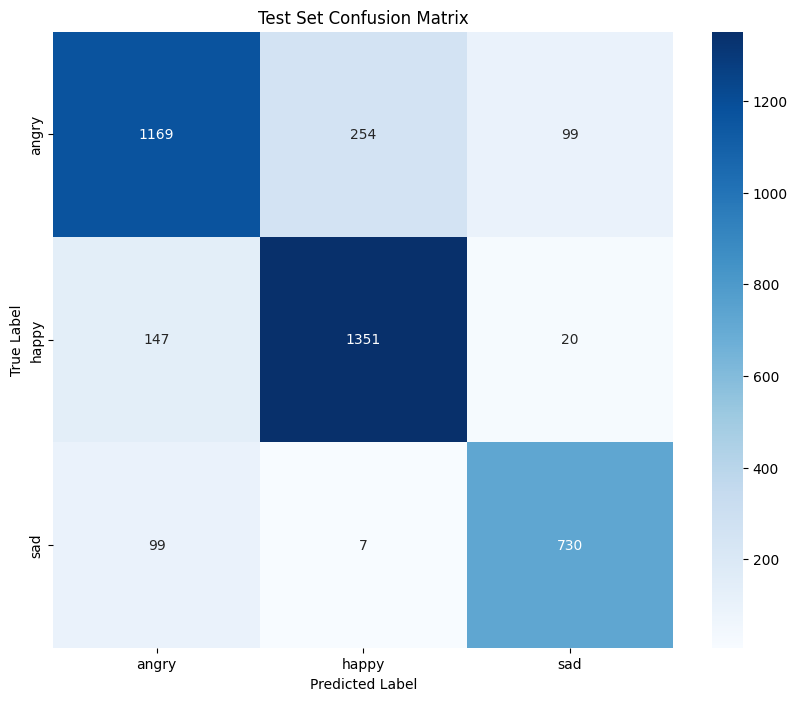


Number of samples for each class in the test set:
angry: 1522 samples
happy: 1518 samples
sad: 836 samples


In [2]:
# Run on Test Set
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import joblib
import matplotlib.pyplot as plt

# 1. Set image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 2. Define Dataset class
class DogEmotionFileDataset(Dataset):
    def __init__(self, filepaths, labels, transform=None):
        self.filepaths = filepaths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.filepaths)

    def __getitem__(self, idx):
        img_path = self.filepaths[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, label

# 3. Load training data to fit the label encoder
train_dir = os.path.join(os.getcwd(), 'dog label/clean/train')
train_filepaths = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
train_labels = [os.path.basename(f).split('_')[0] for f in train_filepaths]

le = LabelEncoder()
le.fit(train_labels)  # Fit the LabelEncoder on training labels

# Save the LabelEncoder
# np.save('label_encoder.npy', le.classes_)
joblib.dump(le, 'label_encoder.joblib')

# 4. Load test data
test_dir = os.path.join(os.getcwd(), 'dog label/clean/test')
test_filepaths = [os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
test_labels = [os.path.basename(f).split('_')[0] for f in test_filepaths]
encoded_test_labels = le.transform(test_labels)

test_dataset = DogEmotionFileDataset(test_filepaths, encoded_test_labels, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 5. Define and load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(le.classes_)

model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Load best model weights
best_model_path = os.path.join(os.getcwd(), 'best_resnet_dog_model.pth')
model.load_state_dict(torch.load(best_model_path, map_location=device))
model.eval()  # Set to evaluation mode

# 6. Evaluate on test set
all_preds = []
all_labels = []
all_probs = []  # For AUC calculation

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probabilities.cpu().numpy())

# 7. Print detailed classification report
print(f"ResNet18 Classification Report (including Recall, Precision, F1-score):")
class_names = le.classes_
report = classification_report(all_labels, all_preds, target_names=class_names, digits=2)
print(report)

# 8. Calculate and print AUC scores
all_probs_array = np.array(all_probs)
all_labels_array = np.array(all_labels)

# One-hot encode the labels for multi-class AUC calculation
y_true_one_hot = np.zeros((len(all_labels_array), num_classes))
for i, val in enumerate(all_labels_array):
    y_true_one_hot[i, val] = 1

# Calculate macro and weighted AUC
macro_auc = roc_auc_score(y_true_one_hot, all_probs_array, multi_class='ovr', average='macro')
weighted_auc = roc_auc_score(y_true_one_hot, all_probs_array, multi_class='ovr', average='weighted')

print(f"\nResNet18 Macro AUC: {macro_auc:.3f}")
print(f"ResNet18 Weighted AUC: {weighted_auc:.3f}")

# 9. Create confusion matrix visualization
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Set Confusion Matrix')
plt.savefig('test_confusion_matrix.png')
plt.show()

# 10. Print number of samples for each class in test set
unique_labels, counts = np.unique(all_labels, return_counts=True)
print("\nNumber of samples for each class in the test set:")
for i, label in enumerate(class_names):
    if i in unique_labels:
        idx = np.where(unique_labels == i)[0][0]
        print(f"{label}: {counts[idx]} samples")
    else:
        print(f"{label}: 0 samples")

## Adding Grad-CAM

In [3]:
import cv2
import torch.nn.functional as F

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_layers()

    def hook_layers(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def generate_heatmap(self, input_tensor, class_idx=None):
        self.model.eval()
        output = self.model(input_tensor)

        if class_idx is None:
            class_idx = torch.argmax(output)

        loss = output[:, class_idx]
        self.model.zero_grad()
        loss.backward()

        # Get the gradients and activations
        gradients = self.gradients
        activations = self.activations

        weights = gradients.mean(dim=[2, 3], keepdim=True)
        cam = (weights * activations).sum(dim=1, keepdim=True)
        cam = F.relu(cam)
        cam = cam.squeeze().cpu().numpy()
        cam = cv2.resize(cam, (input_tensor.shape[2], input_tensor.shape[3]))
        cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)  # Normalize
        return cam


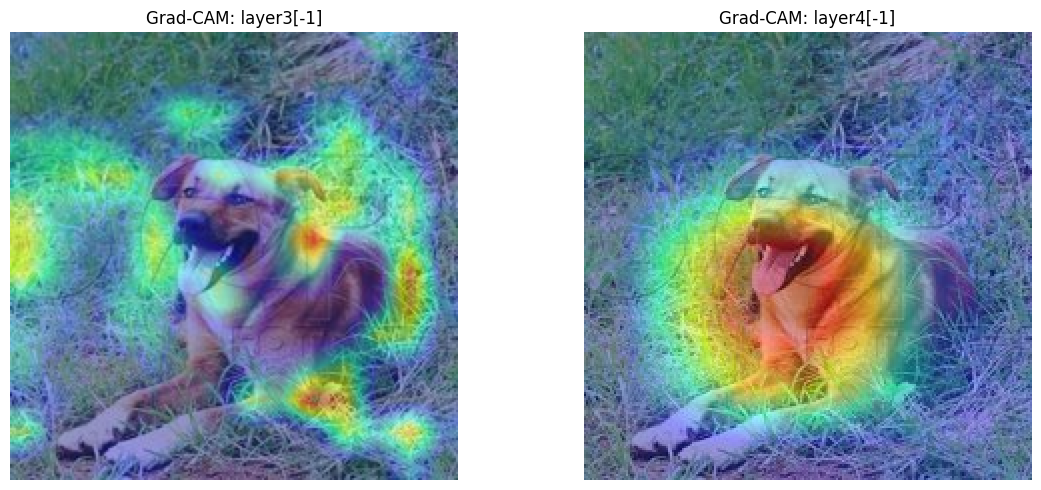

In [13]:
# --- Load a single image from test set ---
img_path = test_filepaths[7]
image = Image.open(img_path).convert("RGB")
transformed_image = transform(image).unsqueeze(0).to(device)
img_np = np.array(image.resize((224, 224)))  # For overlay

# --- Grad-CAM for layer3 and layer4 ---
grad_cam3 = GradCAM(model, model.layer3[-1])
grad_cam4 = GradCAM(model, model.layer4[-1])

heatmap3 = grad_cam3.generate_heatmap(transformed_image)
heatmap4 = grad_cam4.generate_heatmap(transformed_image)

# --- Overlay helper ---
def overlay_heatmap(heatmap, original_img):
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)
    overlay = np.uint8(heatmap_color * 0.4 + original_img * 0.6)
    return overlay

overlay3 = overlay_heatmap(heatmap3, img_np)
overlay4 = overlay_heatmap(heatmap4, img_np)

# --- Show side-by-side comparison ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(overlay3)
plt.title("Grad-CAM: layer3[-1]")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(overlay4)
plt.title("Grad-CAM: layer4[-1]")
plt.axis("off")

plt.tight_layout()
plt.show()


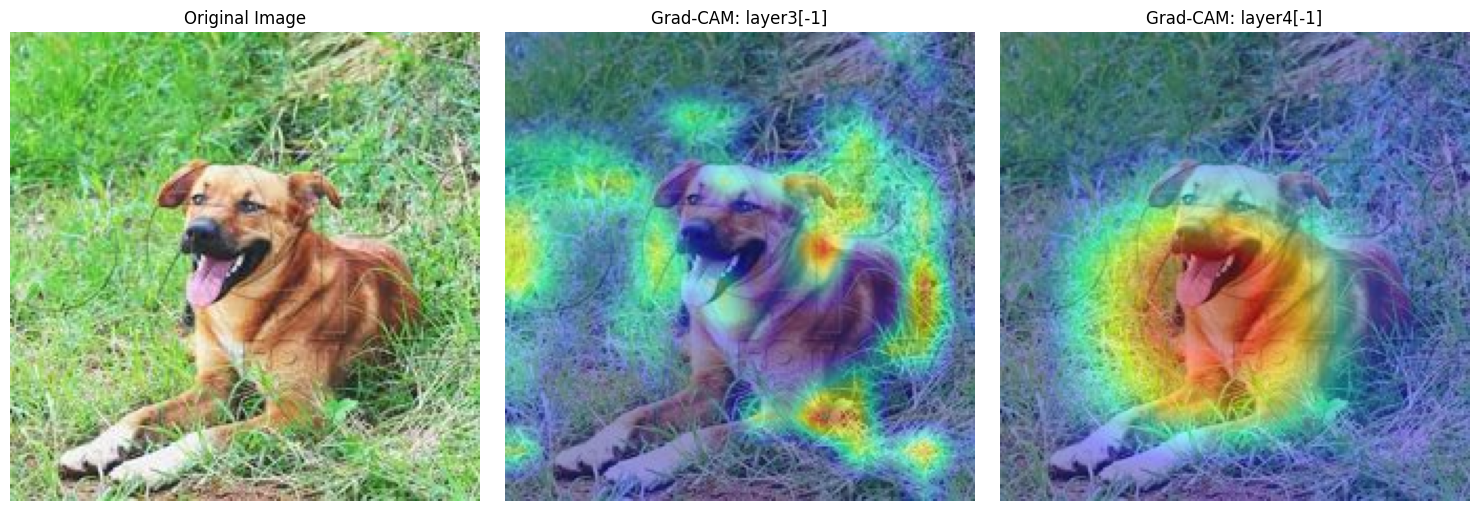

In [14]:
# --- Show side-by-side comparison ---
plt.figure(figsize=(15, 5))  # Adjust figure size for 3 plots

# --- 1. Original Image ---
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
plt.imshow(image)  # Assuming img_np holds the original image
plt.title("Original Image")
plt.axis("off")

# --- 2. Grad-CAM: layer3[-1] ---
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
plt.imshow(overlay3)
plt.title("Grad-CAM: layer3[-1]")
plt.axis("off")

# --- 3. Grad-CAM: layer4[-1] ---
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
plt.imshow(overlay4)
plt.title("Grad-CAM: layer4[-1]")
plt.axis("off")

plt.tight_layout()
plt.show()

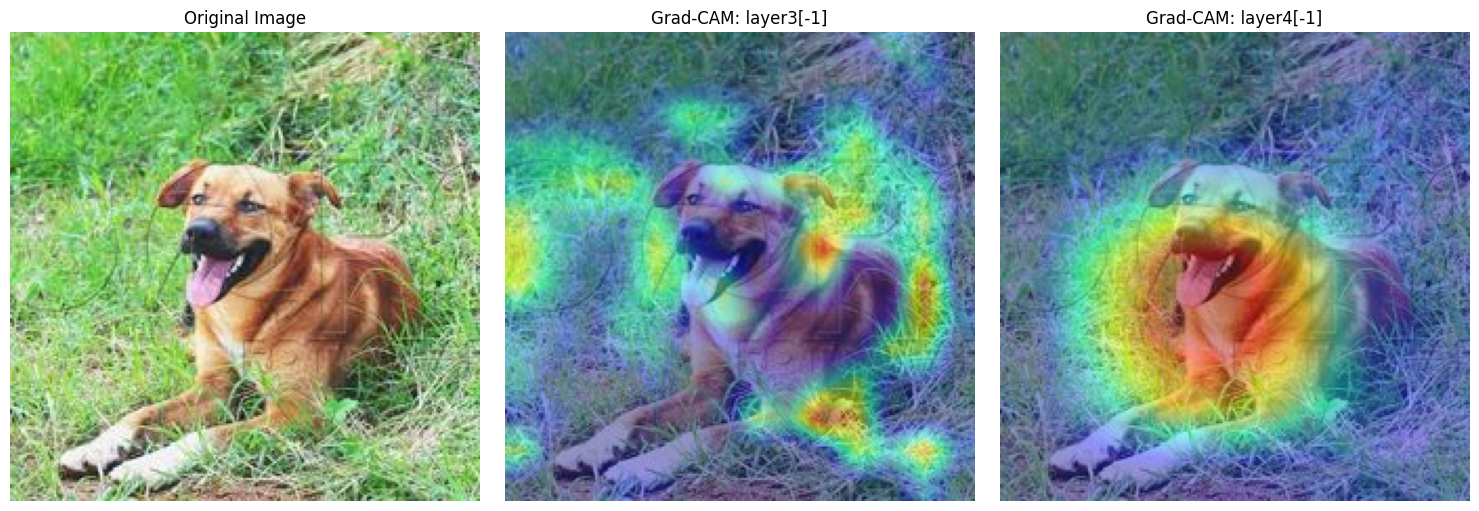

In [15]:
# --- Show side-by-side comparison ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create figure and axes
fig.patch.set_facecolor('none')  # Set figure background to transparent

# --- 1. Original Image ---
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# --- 2. Grad-CAM: layer3[-1] ---
axes[1].imshow(overlay3)
axes[1].set_title("Grad-CAM: layer3[-1]")
axes[1].axis("off")

# --- 3. Grad-CAM: layer4[-1] ---
axes[2].imshow(overlay4)
axes[2].set_title("Grad-CAM: layer4[-1]")
axes[2].axis("off")

plt.tight_layout()
plt.savefig('gradcam_visualization.png', transparent=True)  # Save with transparent background
plt.show()

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, GPT2Tokenizer, GPTNeoForCausalLM#, BertTokenizer, BertForCausalLM
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM
import cv2
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def test_model(resnet_model, test_loader, device, le):
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = resnet_model(images)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probabilities.cpu().numpy())

    class_names = le.classes_
    report = classification_report(all_labels, all_preds, target_names=class_names, digits=2)
    cm = confusion_matrix(all_labels, all_preds)

    return all_preds, all_labels, all_probs, report, cm

def generate_explanation(image, predicted_class, heatmap, llm_tokenizer, llm_model, probabilities, classification_report, confusion_matrix, auc_scores, heatmap_regions, previous_explanations, similarity_threshold=0.8):
    # Find the index of the predicted class
    predicted_class_index = np.argmax(probabilities)

    # Preprocess the input
    input_text = f"The model predicted the dog's emotion as {predicted_class} with a probability of {probabilities[predicted_class_index]:.2f}. "
    input_text += f"The classification report shows the following metrics for each emotion class: {classification_report}. "
    input_text += f"The confusion matrix indicates that the most common misclassifications are: {confusion_matrix}. "
    input_text += f"The macro and weighted AUC scores are {auc_scores['macro']:.2f} and {auc_scores['weighted']:.2f}, respectively. "
    input_text += f"The heatmap highlights the following regions of the image that contributed most to the prediction: {heatmap_regions}."

    # Tokenize the input
    input_ids = llm_tokenizer.encode(input_text, return_tensors='pt')
    attention_mask = torch.ones(input_ids.shape, dtype=torch.long)

    # Generate the explanation
    output = llm_model.generate(
        input_ids,
        attention_mask=attention_mask,
        max_length=388,
        num_return_sequences=1,
        pad_token_id=llm_tokenizer.eos_token_id
    )

    explanation = llm_tokenizer.decode(output[0], skip_special_tokens=True)

    # Check similarity with previous explanations
    if previous_explanations:
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform([explanation] + previous_explanations)
        similarity_scores = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])
        max_similarity = np.max(similarity_scores)

        if max_similarity >= similarity_threshold:
            # If the explanation is too similar, generate a new one
            return generate_explanation(image, predicted_class, heatmap, llm_tokenizer, llm_model, probabilities, classification_report, confusion_matrix, auc_scores, heatmap_regions, previous_explanations, similarity_threshold)

    return explanation

In [ ]:
# Load the LLM tokenizer and model from Hugging Face
# llm_model_name = "gpt2"  # Example: Using GPT-2, but you can choose a different LLM
# llm_tokenizer = AutoTokenizer.from_pretrained(llm_model_name)
# llm_model = AutoModelForCausalLM.from_pretrained(llm_model_name)
# llm_model_name = "bert-base-uncased"
# llm_tokenizer = BertTokenizer.from_pretrained(llm_model_name)
# llm_model = BertForCausalLM.from_pretrained(llm_model_name)
llm_model_name = "EleutherAI/gpt-neo-1.3B"  # Using GPT-Neo 1.3B model
llm_tokenizer = GPT2Tokenizer.from_pretrained(llm_model_name)
llm_model = GPTNeoForCausalLM.from_pretrained(llm_model_name)

# Define and load the ResNet model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(le.classes_)

resnet_model = models.resnet18(pretrained=False)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, num_classes)
resnet_model = resnet_model.to(device)

# Load best ResNet model weights
best_resnet_model_path = os.path.join(os.getcwd(), 'best_resnet_dog_model.pth')
resnet_model.load_state_dict(torch.load(best_resnet_model_path, map_location=device))
resnet_model.eval()  # Set to evaluation mode

# Test the ResNet model
all_preds, all_labels, all_probs, report, cm = test_model(resnet_model, test_loader, device, le)

# Generate heatmap for a sample image
sample_image, _ = test_dataset[0]  # Get the first image from the test dataset
sample_image_np = sample_image.permute(1, 2, 0).numpy()  # Convert to numpy array
sample_image_tensor = sample_image.unsqueeze(0).to(device)  # Add batch dimension and move to device
target_layer = resnet_model.layer4[-1]  # Choose the target layer for GradCAM
gradcam = GradCAM(resnet_model, target_layer)
heatmap = gradcam.generate_heatmap(sample_image_tensor)

# Threshold the heatmap and find contours
threshold = 0.5
binary_heatmap = (heatmap > threshold).astype(np.uint8)
contours, _ = cv2.findContours(binary_heatmap, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract information about the heatmap regions
heatmap_regions = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    region_info = f"Region: ({x}, {y}) - ({x+w}, {y+h})"
    heatmap_regions.append(region_info)

heatmap_regions = ", ".join(heatmap_regions)

# Calculate AUC scores
all_probs_array = np.array(all_probs)
all_labels_array = np.array(all_labels)

# One-hot encode the labels for multi-class AUC calculation
y_true_one_hot = np.zeros((len(all_labels_array), num_classes))
for i, val in enumerate(all_labels_array):
    y_true_one_hot[i, val] = 1

# Calculate macro and weighted AUC
macro_auc = roc_auc_score(y_true_one_hot, all_probs_array, multi_class='ovr', average='macro')
weighted_auc = roc_auc_score(y_true_one_hot, all_probs_array, multi_class='ovr', average='weighted')
auc_scores = {'macro': macro_auc, 'weighted': weighted_auc}

# Initialize an empty list to store previous explanations
previous_explanations = []

# Generate explanation using the LLM
# Generate explanation using the LLM
predicted_class = le.classes_[all_preds[0]]
probabilities = all_probs[0]
explanation = generate_explanation(sample_image, predicted_class, heatmap, llm_tokenizer, llm_model, probabilities, report, cm, auc_scores, heatmap_regions, previous_explanations)

# Append the generated explanation to the list of previous explanations
previous_explanations.append(explanation)

print("Explanation:")
print(explanation)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


Explanation:
The model predicted the dog's emotion as happy with a probability of 1.00. The classification report shows the following metrics for each emotion class:               precision    recall  f1-score   support

       angry       0.83      0.77      0.80      1522
       happy       0.84      0.89      0.86      1518
         sad       0.86      0.87      0.87       836

    accuracy                           0.84      3876
   macro avg       0.84      0.84      0.84      3876
weighted avg       0.84      0.84      0.84      3876
. The confusion matrix indicates that the most common misclassifications are: [[1169  254   99]
 [ 147 1351   20]
 [  99    7  730]]. The macro and weighted AUC scores are 0.95 and 0.95, respectively. The heatmap highlights the following regions of the image that contributed most to the prediction: Region: (74, 95) - (174, 194).

